# **1. Thư viện**

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import xgboost as xgb
import joblib
import shap
import os

c:\DEV\python_code\Project\Rủi ro tín dụng\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
print(os.listdir("../Rủi ro tín dụng"))

['german_credit_data.csv', 'output_first_5_rows.csv', 'test.ipynb', 'venv']


| **Tên biến**          | **Ý nghĩa** |
|-----------------------|------------|
| **Age**              | Tuổi của khách hàng. |
| **Sex**              | Giới tính (male/female). |
| **Job**              | Loại công việc (số nguyên). |
| **Housing**          | Tình trạng nhà ở (rent/own/free). |
| **Saving accounts**  | Số dư tài khoản tiết kiệm (ít, vừa, nhiều hoặc NaN). |
| **Checking account** | Số dư tài khoản thanh toán (little/moderate/rich hoặc NaN). |
| **Credit amount**    | Số tiền vay. |
| **Duration**        | Thời gian vay (tháng). |
| **Purpose**         | Mục đích vay tiền (car, education, furniture, etc.). |
| **Risk**            | Nhãn dự đoán (good = không vỡ nợ, bad = vỡ nợ). |


In [4]:
data = pd.read_csv("../Rủi ro tín dụng/german_credit_data.csv")
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


# **2. Tiền xử lý dữ liệu**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [6]:
data.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


In [7]:
data.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [8]:
data = data.drop(columns=["Unnamed: 0"])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.3+ KB


In [9]:
# Check missing values
data.isnull().sum().sort_values(ascending=False)

Checking account    394
Saving accounts     183
Sex                   0
Age                   0
Housing               0
Job                   0
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [10]:
data["Checking account"].fillna("None", inplace=True)

C:\Users\inhta\AppData\Local\Temp\ipykernel_22096\3196428634.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Checking account"].fillna("None", inplace=True)


In [11]:
data.isnull().sum().sort_values(ascending=False)

Saving accounts     183
Age                   0
Sex                   0
Job                   0
Housing               0
Checking account      0
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [12]:
data["Saving accounts"].fillna("none", inplace=True)

C:\Users\inhta\AppData\Local\Temp\ipykernel_22096\3013987625.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Saving accounts"].fillna("none", inplace=True)


In [13]:
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,none,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,None,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


# **3. Phân tích dữ liệu**

In [14]:
print(data["Risk"].value_counts(normalize=True) * 100)

Risk
good    70.0
bad     30.0
Name: proportion, dtype: float64


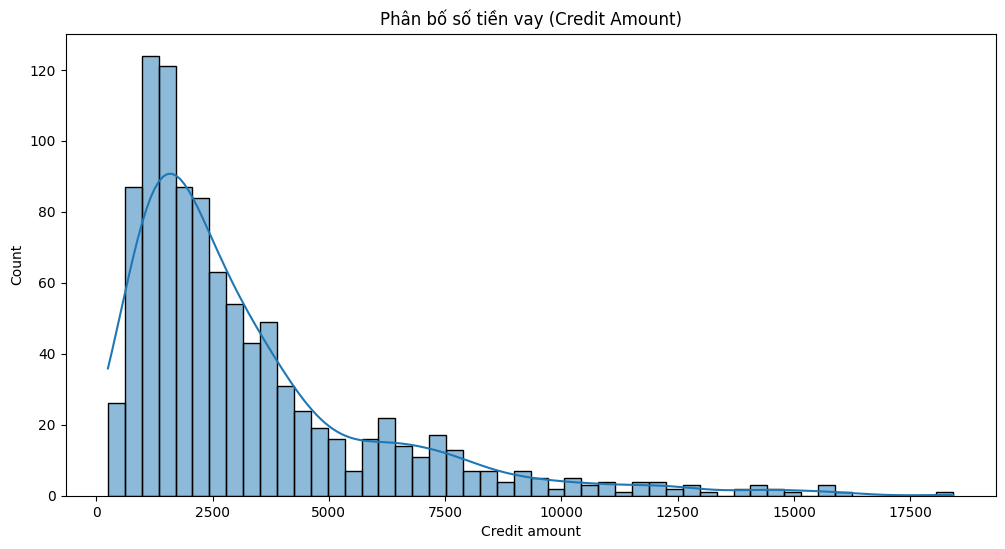

In [15]:
plt.figure(figsize=(12, 6))
sns.histplot(data["Credit amount"], bins=50, kde=True)
plt.title("Phân bố số tiền vay (Credit Amount)")
plt.show()

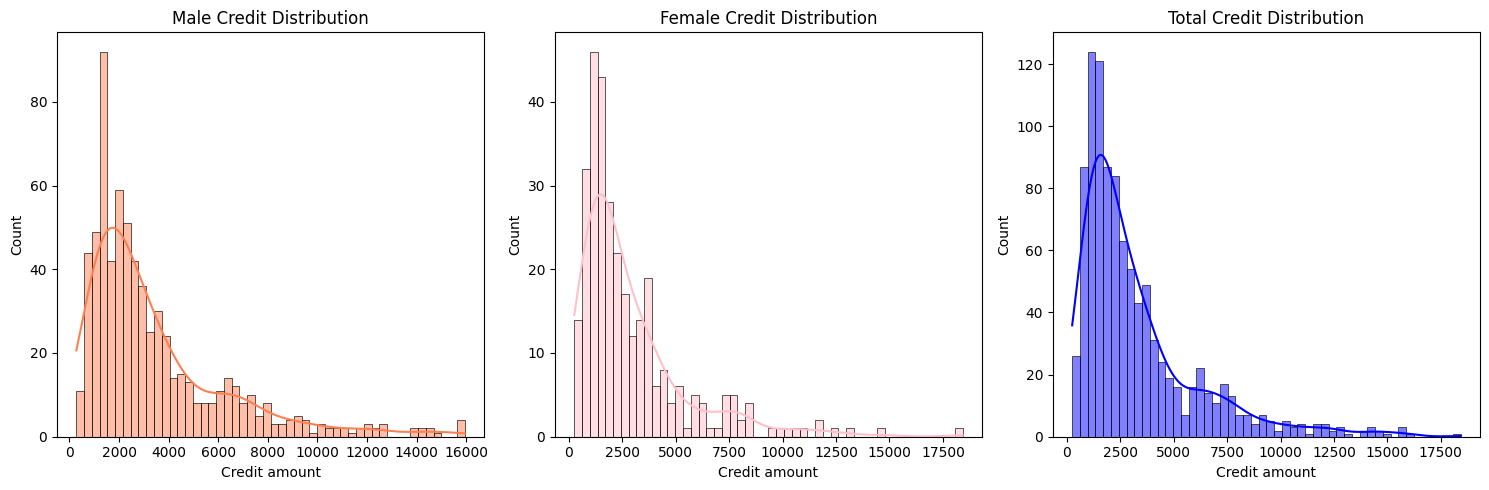

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Vẽ phân bố khoản vay của nam
sns.histplot(data[data["Sex"] == "male"]["Credit amount"], bins=50, kde=True, color="coral", ax=axes[0])
axes[0].set_title("Male Credit Distribution")

# Vẽ phân bố khoản vay của nữ
sns.histplot(data[data["Sex"] == "female"]["Credit amount"], bins=50, kde=True, color="pink", ax=axes[1])
axes[1].set_title("Female Credit Distribution")

# Vẽ phân bố tổng tất cả
sns.histplot(data["Credit amount"], bins=50, kde=True, color="blue", ax=axes[2])
axes[2].set_title("Total Credit Distribution")

plt.tight_layout()
plt.show()

C:\Users\inhta\AppData\Local\Temp\ipykernel_22096\3931943303.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Risk", y="Credit amount", data=data, palette="coolwarm")


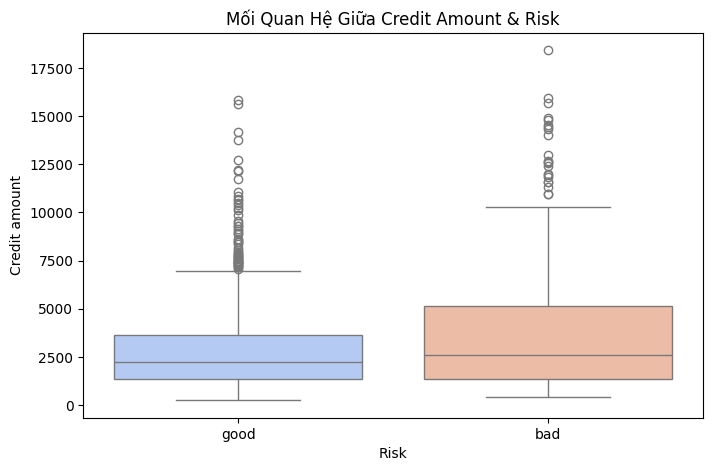

In [17]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="Risk", y="Credit amount", data=data, palette="coolwarm")
plt.title("Mối Quan Hệ Giữa Credit Amount & Risk")
plt.show()

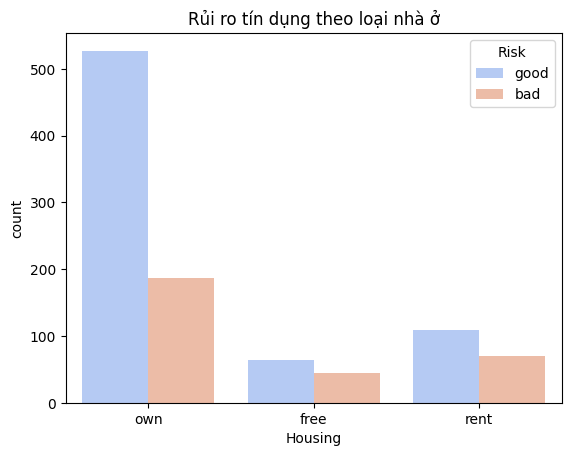

In [18]:
sns.countplot(x="Housing", hue="Risk", data=data, palette="coolwarm")
plt.title("Rủi ro tín dụng theo loại nhà ở")
plt.show()


# Phân tích dữ liệu rủi ro tín dụng

## 1. Phân bố số tiền vay (Credit Amount Distribution)
- Số tiền vay có **phân phối lệch phải**, nghĩa là phần lớn các khoản vay có giá trị thấp, chỉ có một số ít khoản vay có giá trị rất cao.
- Điều này có thể ảnh hưởng đến mô hình dự đoán rủi ro tín dụng, do đó **có thể cần chuẩn hóa hoặc biến đổi dữ liệu**.

## 2. So sánh khoản vay giữa nam và nữ
- Cả hai giới có **phân phối khoản vay khá giống nhau** nhưng có thể có sự chênh lệch nhỏ về mức độ phân tán.
- Việc kiểm tra xem **giới tính có ảnh hưởng đến rủi ro tín dụng** có thể là một yếu tố quan trọng trong mô hình.

## 3. Mối quan hệ giữa số tiền vay và rủi ro tín dụng
- Nhìn vào biểu đồ Boxplot, **những khách hàng có rủi ro tín dụng "bad" thường có khoản vay cao hơn** so với nhóm "good".
- Điều này có thể là một dấu hiệu cho thấy **những khoản vay lớn có nguy cơ vỡ nợ cao hơn**.

## 4. Rủi ro tín dụng theo loại nhà ở
- **Người sở hữu nhà ("own") có tỷ lệ rủi ro thấp hơn đáng kể** so với người thuê nhà ("rent") hoặc sống miễn phí ("free").
- Đây có thể là một yếu tố quan trọng cần xem xét khi xây dựng mô hình vì **loại nhà ở có thể phản ánh sự ổn định tài chính của người vay**.

In [19]:
le = LabelEncoder()
data["Risk"] = le.fit_transform(data["Risk"])  # "good" → 1, "bad" → 0
data["Sex"] = le.fit_transform(data["Sex"])    # "male" → 1, "female" → 0

In [20]:
# Mã hóa các biến phân loại còn lại
data = pd.get_dummies(data, columns=["Purpose"], drop_first=True)

# Chuẩn hóa các biến số học 
scaler = StandardScaler()
numeric_features = ['Age', 'Credit amount', 'Duration']
data[numeric_features] = scaler.fit_transform(data[numeric_features])

In [21]:
data = pd.get_dummies(data, columns=["Housing", "Saving accounts", "Checking account"], drop_first=True)


In [22]:
data.head()

,Age,Sex,Job,Credit amount,Duration,Risk,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,...,Purpose_vacation/others,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_none,Saving accounts_quite rich,Saving accounts_rich,Checking account_little,Checking account_moderate,Checking account_rich
0,2.766456,1,2,-0.745131,-1.236478,1,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,-1.191404,0,2,0.949817,2.248194,0,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
2,1.183312,1,1,-0.416562,-0.738668,1,False,False,True,False,...,False,True,False,False,False,False,False,False,False,False
3,0.831502,1,2,1.634247,1.750384,1,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
4,1.535122,1,2,0.566664,0.256953,0,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [23]:
# Định nghĩa biến mục tiêu và biến đặc trưng
X = data.drop(['Risk'], axis=1)  # Loại bỏ cột index nếu có
y = data['Risk']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra (80% huấn luyện, 20% kiểm tra)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Kích thước tập huấn luyện: {X_train.shape}")
print(f"Kích thước tập kiểm tra: {X_test.shape}")

Kích thước tập huấn luyện: (800, 21)
Kích thước tập kiểm tra: (200, 21)


# **4. Xây dựng mô hình**

### **4.1 Logistic regression**

In [24]:
# Khởi tạo và huấn luyện mô hình hồi quy logistic
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred_lr = lr_model.predict(X_test)
y_prob_lr = lr_model.predict_proba(X_test)[:, 1]

# Đánh giá mô hình
print("Logistic Regression:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

Logistic Regression:
Accuracy: 0.7450

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.37      0.46        59
           1       0.77      0.90      0.83       141

    accuracy                           0.74       200
   macro avg       0.69      0.64      0.65       200
weighted avg       0.73      0.74      0.72       200



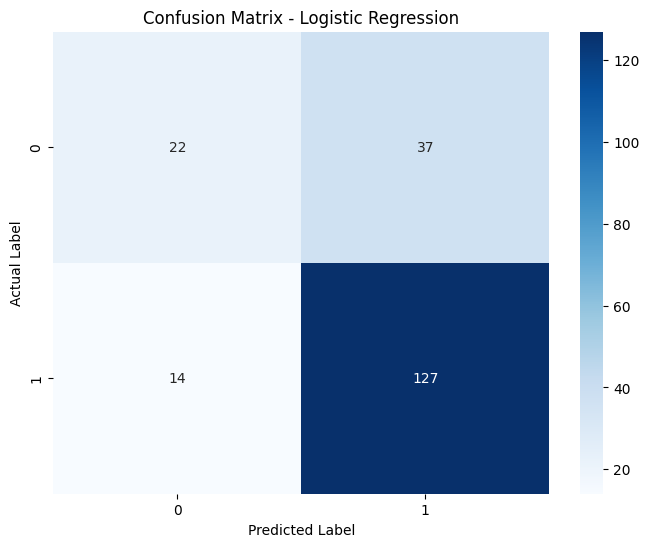

In [25]:
# Vẽ ma trận nhầm lẫn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

### **4.2 Random Forest**

In [26]:
# Khởi tạo và huấn luyện mô hình Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# Đánh giá mô hình
print("Random Forest:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest:
Accuracy: 0.7800

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.46      0.55        59
           1       0.80      0.91      0.85       141

    accuracy                           0.78       200
   macro avg       0.75      0.69      0.70       200
weighted avg       0.77      0.78      0.76       200



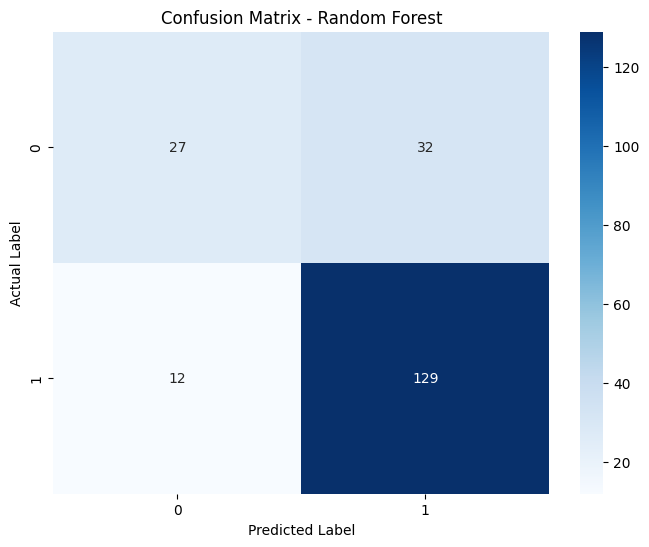

In [27]:
# Vẽ ma trận nhầm lẫn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

### **4.3 XGBoost**

In [28]:
# Khởi tạo và huấn luyện mô hình XGBoost
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    random_state=42
)
xgb_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Đánh giá mô hình
print("XGBoost:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))

XGBoost:
Accuracy: 0.7650

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.44      0.53        59
           1       0.79      0.90      0.84       141

    accuracy                           0.77       200
   macro avg       0.72      0.67      0.68       200
weighted avg       0.75      0.77      0.75       200



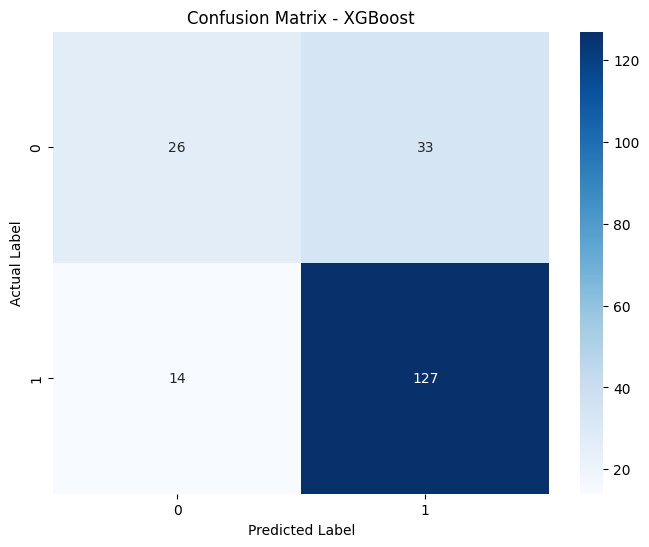

In [29]:
# Vẽ ma trận nhầm lẫn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - XGBoost')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

### **4.4 Decision Tree**

In [30]:
# Khởi tạo và huấn luyện mô hình Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred_dt = dt_model.predict(X_test)
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]

# Đánh giá mô hình
print("Decision Tree:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

Decision Tree:
Accuracy: 0.6500

Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.47      0.44        59
           1       0.77      0.72      0.74       141

    accuracy                           0.65       200
   macro avg       0.59      0.60      0.59       200
weighted avg       0.66      0.65      0.66       200



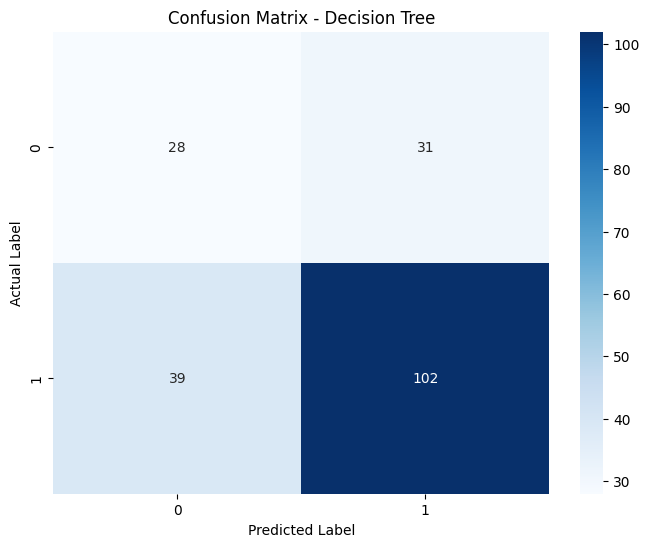

In [31]:
# Vẽ ma trận nhầm lẫn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Decision Tree')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

### **4.5 SVM**

In [32]:
# Khởi tạo và huấn luyện mô hình SVM
# Lưu ý: SVM có thể mất nhiều thời gian với tập dữ liệu lớn, sử dụng probability=True để lấy xác suất
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred_svm = svm_model.predict(X_test)
y_prob_svm = svm_model.predict_proba(X_test)[:, 1]

# Đánh giá mô hình
print("Support Vector Machine:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

Support Vector Machine:
Accuracy: 0.7550

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.24      0.36        59
           1       0.75      0.97      0.85       141

    accuracy                           0.76       200
   macro avg       0.77      0.60      0.61       200
weighted avg       0.76      0.76      0.71       200



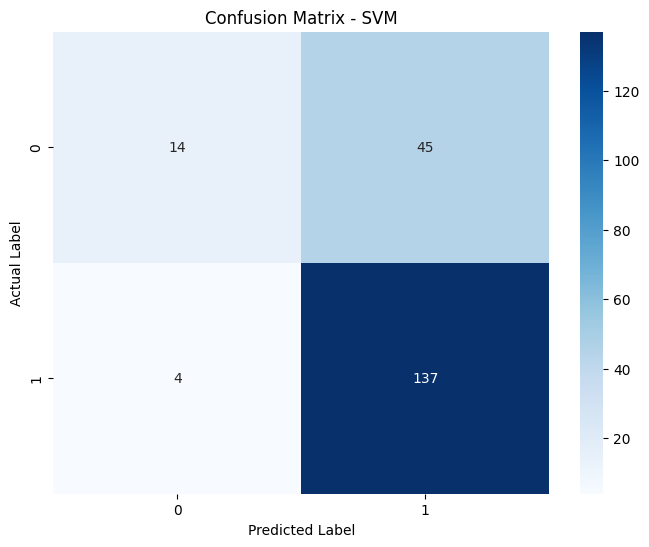

In [33]:
# Vẽ ma trận nhầm lẫn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - SVM')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [34]:
models = {
    'Logistic Regression': (y_pred_lr, y_prob_lr),
    'Random Forest': (y_pred_rf, y_prob_rf),
    'XGBoost': (y_pred_xgb, y_prob_xgb),
    'Decision Tree': (y_pred_dt, y_prob_dt),
    'SVM': (y_pred_svm, y_prob_svm)
}

comparison = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC'])

for i, (model_name, (y_pred, y_prob)) in enumerate(models.items()):
    comparison.loc[i] = [
        model_name,
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred, average='weighted'),
        recall_score(y_test, y_pred, average='weighted'),
        f1_score(y_test, y_pred, average='weighted'),
        roc_auc_score(y_test, y_prob)
    ]

comparison = comparison.sort_values('AUC', ascending=False).reset_index(drop=True)
comparison

,Model,Accuracy,Precision,Recall,F1-Score,AUC
0,XGBoost,0.765,0.751344,0.765,0.749866,0.805986
1,SVM,0.755,0.760131,0.755,0.705322,0.776656
2,Random Forest,0.780,0.769107,0.780,0.764836,0.768662
3,Logistic Regression,0.745,0.726223,0.745,0.723746,0.749730
4,Decision Tree,0.650,0.663960,0.650,0.656002,0.598990


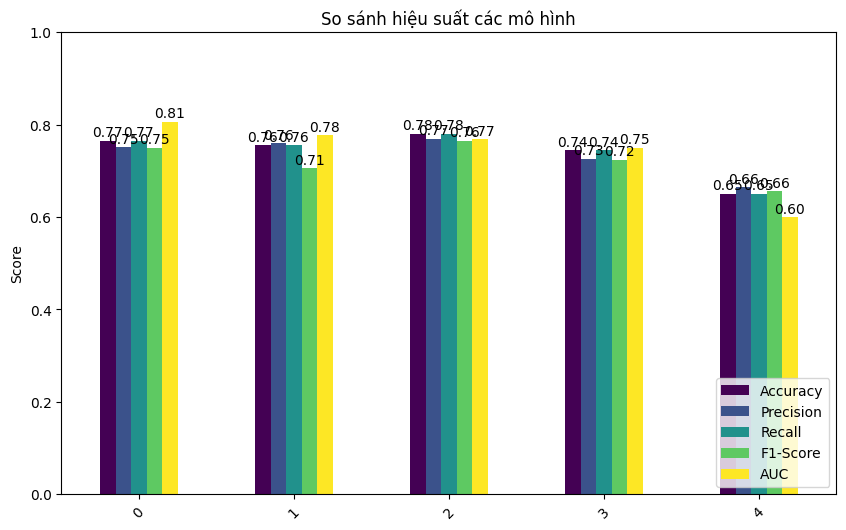

In [36]:
ax = comparison.plot(kind="bar", figsize=(10,6), colormap="viridis", rot=45)
plt.title("So sánh hiệu suất các mô hình")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.legend(loc="lower right")

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline',
                fontsize=10, color='black',
                xytext=(0, 3), textcoords='offset points')

plt.show()

###  Đánh giá các mô hình dự đoán rủi ro tín dụng  

| Mô hình               | Đánh giá |
|-----------------------|----------|
| **XGBoost**          |  Hiệu suất cao nhất, xử lý tốt dữ liệu mất cân bằng, khả năng tổng quát hóa tốt.  **Khuyến nghị sử dụng!** |
| **Random Forest**    |  Tốt nhưng AUC thấp hơn XGBoost, dễ giải thích hơn.  **Lựa chọn thay thế tốt** |
| **SVM**             |  Tốt trên tập dữ liệu nhỏ nhưng khó mở rộng. ⚠ Chạy chậm trên tập lớn. |
| **Logistic Regression** |  Mô hình đơn giản, dễ triển khai nhưng hiệu suất trung bình. |
| **Decision Tree**   |  Hiệu suất kém nhất, dễ overfitting. ⚠ Không nên dùng độc lập. |

# **5. Kết luận**
- **XGBoost** là lựa chọn tốt nhất.
- **Random Forest** là phương án thay thế nếu cần mô hình dễ giải thích hơn.
- **SVM** chỉ phù hợp nếu tập dữ liệu nhỏ hoặc cần mô hình phi tuyến tính mạnh.
- **Logistic Regression** phù hợp khi cần mô hình đơn giản và dễ triển khai.
- **Decision Tree** không phù hợp, chỉ nên kết hợp trong ensemble (Random Forest, XGBoost).